# Insurance cost prediction using linear regression

In [1]:
#Probelm Statement : n this dataset we're going to use information like a person's age, sex, BMI, no. of children 
    #and smoking habit to predict the price of yearly medical bills. This kind of model is useful for 
    #insurance companies to determine the yearly insurance premium for a person. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [4]:
df.shape

(1338, 8)

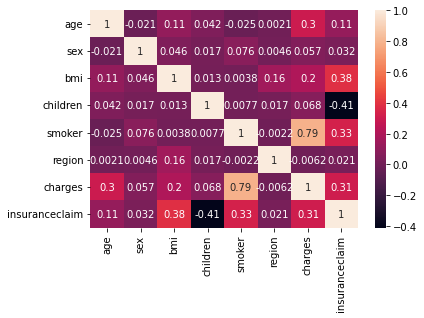

In [5]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [7]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

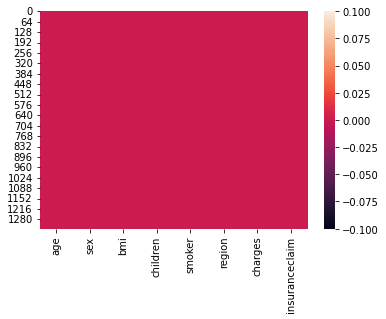

In [8]:
sns.heatmap(df.isnull())
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [10]:
df_cat=df.select_dtypes("object")
df_num=df.select_dtypes(["int64","float64"])

In [11]:
df_cat.head()

""
0
1
2
3
4


In [12]:
df_num.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


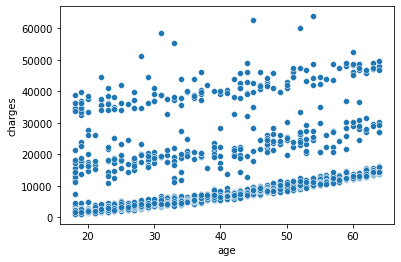

In [13]:
sns.scatterplot(data=df_num,x='age',y='charges')
plt.show()

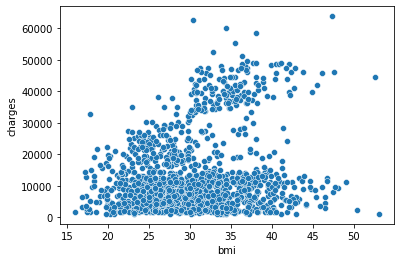

In [14]:
sns.scatterplot(data=df_num,x='bmi',y='charges')
plt.show()

In [15]:
df_num.skew()

age               0.055673
sex              -0.020951
bmi               0.284047
children          0.938380
smoker            1.464766
region           -0.038101
charges           1.515880
insuranceclaim   -0.346254
dtype: float64

skewness:- age 0.05567251565299186
histogram:- age


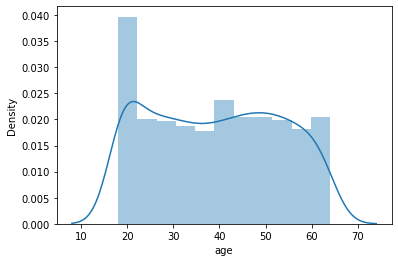

skewness:- sex -0.02095139743334541
histogram:- sex


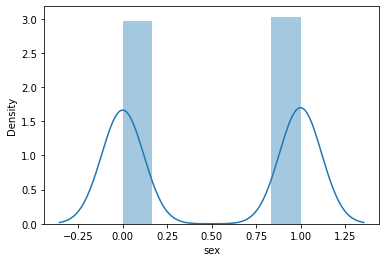

skewness:- bmi 0.2840471105987448
histogram:- bmi


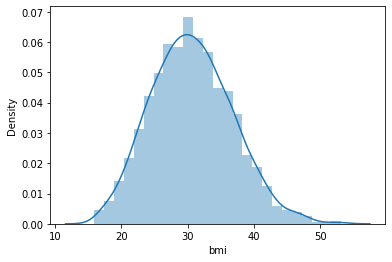

skewness:- children 0.9383804401702414
histogram:- children


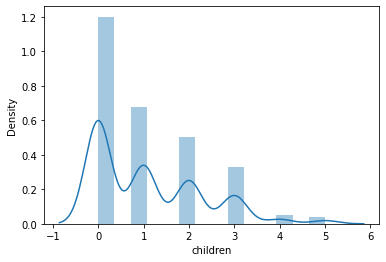

skewness:- smoker 1.4647661601953743
histogram:- smoker


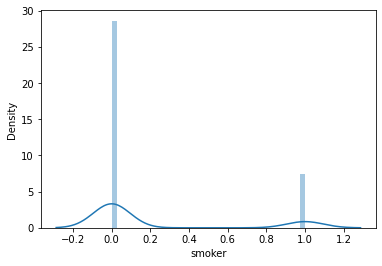

skewness:- region -0.038100508026419524
histogram:- region


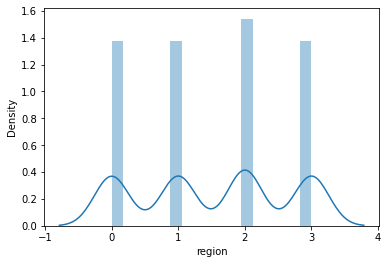

skewness:- charges 1.5158796580240388
histogram:- charges


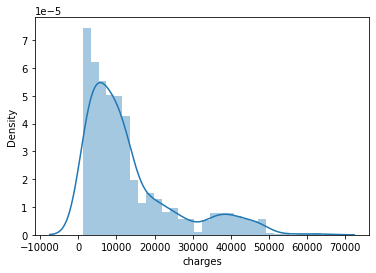

skewness:- insuranceclaim -0.3462539820242364
histogram:- insuranceclaim


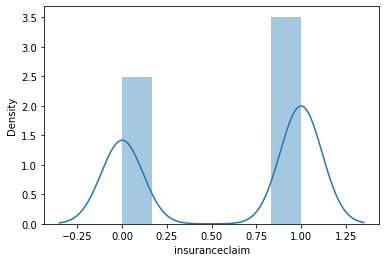

In [16]:
for i in df_num:
    print('skewness:-',format(i),df_num[i].skew())
    print('histogram:-',i)
    sns.distplot(df_num[i])
    plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
for col in df_cat:
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [19]:
df_cat.head()

""
0
1
2
3
4


In [20]:
df_new=pd.concat([df_cat,df_num],axis=1)
df_new.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [21]:
df_new.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

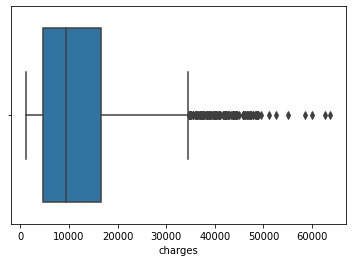

In [22]:
sns.boxplot(data=df_new,x="charges")
plt.show()

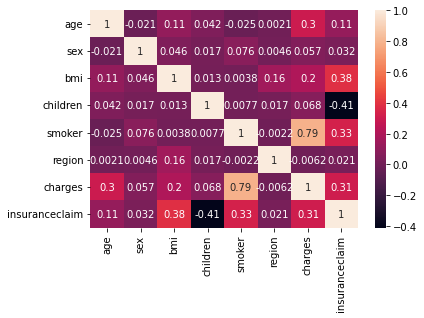

In [23]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [24]:
#now we perform the  modelling
x=df_new.drop("charges",axis=1)
y=df_new["charges"]

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [27]:
x_train.shape

(936, 7)

In [28]:
x_train.head()

,age,sex,bmi,children,smoker,region,insuranceclaim
744,50,1,26.41,0,0,1,1
363,21,0,26.40,1,0,3,0
10,25,1,26.22,0,0,0,1
970,50,0,28.16,3,0,2,1
634,51,1,39.70,1,0,3,1


In [29]:
y_train.shape

(936,)

In [30]:
y_train.head()

744     8827.2099
363     2597.7790
10      2721.3208
970    10702.6424
634     9391.3460
Name: charges, dtype: float64

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [33]:
x_train

array([[ 0.79715222,  0.97676557, -0.70211414, ..., -0.50966434,
        -0.48216742,  0.86010287],
       [-1.27108519, -1.02378711, -0.70375759, ..., -0.50966434,
         1.31230059, -1.16265162],
       [-0.98581107,  0.97676557, -0.73333977, ..., -0.50966434,
        -1.37940142,  0.86010287],
       ...,
       [ 0.86847075, -1.02378711,  0.70303946, ...,  1.96207567,
        -1.37940142,  0.86010287],
       [ 0.0839669 , -1.02378711, -1.39072157, ...,  1.96207567,
         0.41506659, -1.16265162],
       [ 1.29638193,  0.97676557, -0.4506656 , ..., -0.50966434,
         0.41506659, -1.16265162]])

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [36]:
print("slope",lr.coef_)
print("Intercept",lr.intercept_)

slope [ 3610.30849533  -132.96189024  2266.27535956    54.03229354
 10033.70869207  -355.68535648  -897.54884553]
Intercept 13276.698553898505


In [37]:
#we wil test the model
y_pred=lr.predict(x_test)

In [38]:
y_test

559      1646.42970
1087    11353.22760
1020     8798.59300
460     10381.47870
802      2103.08000
           ...     
323     11566.30055
1268     1880.48700
134      2457.21115
1274    17043.34140
876     26140.36030
Name: charges, Length: 402, dtype: float64

In [39]:
from sklearn.metrics import mean_squared_error 

In [40]:
mean_squared_error(y_test,y_pred)

36915293.471183956

In [41]:
from sklearn.metrics import r2_score

In [42]:
r2_score(y_test,y_pred)

0.7395134057909158

In [43]:
residual=y_test-y_pred
residual

559     -2438.848181
1087    -1030.278801
1020    -3435.344165
460     -3732.986263
802      1208.907998
            ...     
323     -4639.250307
1268    -1259.435998
134        41.510134
1274   -10171.227191
876     15982.928051
Name: charges, Length: 402, dtype: float64

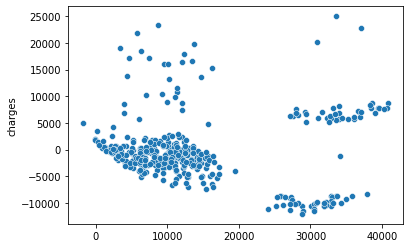

In [44]:
sns.scatterplot(y_pred,residual)
plt.show()

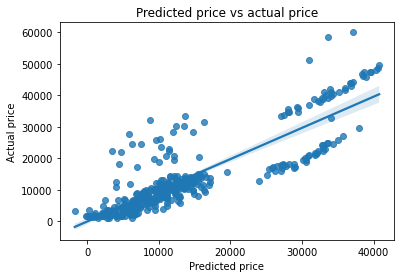

In [45]:
sns.regplot(x=y_pred,y=y_test)
plt.xlabel("Predicted price")
plt.ylabel("Actual price")
plt.title("Predicted price vs actual price")
plt.show()

<AxesSubplot:>

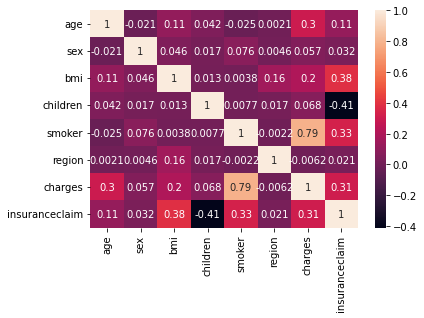

In [46]:
sns.heatmap(df_new.corr(),annot=True)

In [47]:
# ASSUMPTIONS:
# 1
# check correlation between inputs 
# inputs are not co related to each other 
# then check corelation between inputs and outputs





# 2
# check Linear Relation


# 3
# check homoskedastic
#res = y_test - y_pred
#sns.scatterplot(y_pred,res)
#plt.show()


In [48]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(2)

In [49]:
x1 = pf.fit_transform(x)  #train the data
x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size = 0.3,random_state = 1) 

In [50]:
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [51]:
mean_squared_error(y_test,y_pred)

22455028.407729354

In [52]:
r2_score(y_test,y_pred)

0.8415498476975793

In [53]:
lr.score(x_train,y_train)  #training score

0.8477214508618045

In [54]:
lr.score(x_test,y_test)  #testing score

0.8415498476975793

In [55]:
# here Training score > testing score means testing error > training error
# means model os overfitting so remove overfitting situation then 
# add external error on training time means apply regularization

In [56]:
#Now we apply the Regualrization  
#1.Lasso  2. Ridge

In [57]:
#1.Lasso 
from sklearn.linear_model import Lasso
#l1 = Lasso(200)

In [58]:
for i in range(200,1001,50):
    l1 = Lasso(i)
    l1.fit(x_train,y_train)
    s1 = l1.score(x_train,y_train)
    s2 = l1.score(x_test,y_test)
    print("Value of Lambda :- " ,i ,"Score Train :- " ,s1,"Score Test :- " ,s2)

Value of Lambda :-  200 Score Train :-  0.8321646471648696 Score Test :-  0.8260224715819299
Value of Lambda :-  250 Score Train :-  0.8311856608297231 Score Test :-  0.8258267422839317
Value of Lambda :-  300 Score Train :-  0.8307440081520234 Score Test :-  0.8254665445609612
Value of Lambda :-  350 Score Train :-  0.8302852311429485 Score Test :-  0.8250870935133603
Value of Lambda :-  400 Score Train :-  0.829883653315959 Score Test :-  0.8247759184565756
Value of Lambda :-  450 Score Train :-  0.8297249288457329 Score Test :-  0.8247553559297245
Value of Lambda :-  500 Score Train :-  0.8296442395544876 Score Test :-  0.8247354097002627
Value of Lambda :-  550 Score Train :-  0.829555272694247 Score Test :-  0.8247035132378815
Value of Lambda :-  600 Score Train :-  0.8294578168626652 Score Test :-  0.8246614081532506
Value of Lambda :-  650 Score Train :-  0.8293519131707977 Score Test :-  0.8246090766270672
Value of Lambda :-  700 Score Train :-  0.8292500953941815 Score Test :-

In [59]:
l1.score(x_train,y_train)

0.8286841220065776

In [60]:
from sklearn.linear_model import Ridge  #2.Ridge
for i in range(51):
    l2 = Ridge(i)
    l2.fit(x_train,y_train)
    s1 = l2.score(x_train,y_train)
    s2 = l2.score(x_test,y_test)
    print("Value of Lambda :- " ,i ,"Score Train :- " ,s1,"Score Test :- " ,s2)

Value of Lambda :-  0 Score Train :-  0.8475999963258192 Score Test :-  0.8405778766614496
Value of Lambda :-  1 Score Train :-  0.8476084551833221 Score Test :-  0.8412455127132004
Value of Lambda :-  2 Score Train :-  0.8473717529226733 Score Test :-  0.8408078036542512
Value of Lambda :-  3 Score Train :-  0.8470894288784139 Score Test :-  0.8403370664897146
Value of Lambda :-  4 Score Train :-  0.8467935800188312 Score Test :-  0.8398716712597144
Value of Lambda :-  5 Score Train :-  0.8464984768432382 Score Test :-  0.8394265725826816
Value of Lambda :-  6 Score Train :-  0.846210674420174 Score Test :-  0.8390070394409304
Value of Lambda :-  7 Score Train :-  0.8459331193540698 Score Test :-  0.8386141294234098
Value of Lambda :-  8 Score Train :-  0.8456669784550686 Score Test :-  0.8382470511752674
Value of Lambda :-  9 Score Train :-  0.8454125122263682 Score Test :-  0.8379042404072612
Value of Lambda :-  10 Score Train :-  0.8451695152393972 Score Test :-  0.8375838658097117

In [61]:
from sklearn.model_selection import cross_val_score
l1 = Lasso(200)

In [62]:
l1_cross=cross_val_score(l1,x1,y,cv=4)  #craete the object for cross_val_score
l1_cross

array([0.85128396, 0.78988225, 0.84891904, 0.81131005])

In [63]:
l1_cross.mean()  

0.8253488235932114

In [64]:
#Create the object for RIDGE cLASS AND pass the value of Lambda
l2=Ridge(2)


In [65]:
l2_cross=cross_val_score(l1,x1,y,cv=4)   #craete the object for cross_val_score
l2_cross

array([0.85128396, 0.78988225, 0.84891904, 0.81131005])

In [66]:
l2_cross.mean()

0.8253488235932114

In [67]:
#for this dataset lasso and Ridge in any of these are suitable for regualarization